<a href="https://colab.research.google.com/github/Hashirama-789/WSI-Classification/blob/main/Directed_Studies_WSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install openslide on computer using macport.

In [2]:
# import statements
!pip install openslide-python





In [3]:
!sudo apt-get install libopenslide0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libopenslide0
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 89.8 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenslide0 amd64 3.4.1+dfsg-5build1 [89.8 kB]
Fetched 89.8 kB in 1s (69.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libopenslide0.
(Reading database ... 123614 

In [4]:
import openslide
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# get the openslide image
slide1 = openslide.OpenSlide('/content/drive/MyDrive/Directed Studies/patient_001_node_1.tif')
slide1

OpenSlide('/content/drive/MyDrive/Directed Studies/patient_001_node_1.tif')

In [6]:
# number of levels in the slide, level 0 is the highest resolution, level_count-1 is the lowest resolution
print(slide1.level_count)

9


In [7]:
# (width, height) tuple in pixels for level 0 of the slide
print(slide1.dimensions)

(94968, 210579)


In [8]:
# A list of (width, height) tuples, in pixels, one for each level of the slide.
# level_dimensions[k] are the dimensions of level k.
print(slide1.level_dimensions)

((94968, 210579), (47484, 105289), (23742, 52644), (11871, 26322), (5935, 13161), (2967, 6580), (1483, 3290), (741, 1645), (370, 822))


In [9]:
# dimensions (width, height) in pixels of level 0 and 8, the first
# and last level respectively
print(slide1.level_dimensions[0])
print(slide1.level_dimensions[8])

(94968, 210579)
(370, 822)


In [10]:
# get downsample factor for each level, 2 means it is half the original size in both width and height
print(slide1.level_downsamples)

(1.0, 2.0000047488341615, 4.000028493275587, 8.000056986551174, 16.000787941088866, 32.005488258380176, 64.0217681853304, 128.08674673590687, 256.4245511935293)


In [11]:
print(slide1.color_profile)

None


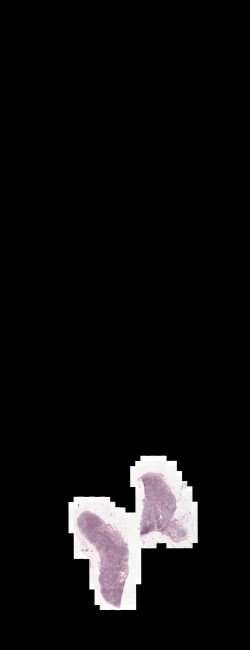

In [12]:
# best size for level 8 and location (0,0)
# size is in (width, height)
slide1.read_region(location=(0, 0), level=8, size=(250,650))


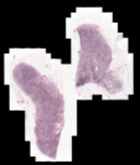

In [13]:
# best size and location for level 8
slide1.read_region(location=(16500, 115000), level=8, size=(140, 165))

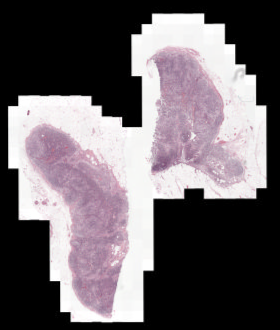

In [14]:
# best size and location for level 7
slide1.read_region(location=(16500, 115000), level=7, size=(280, 330))

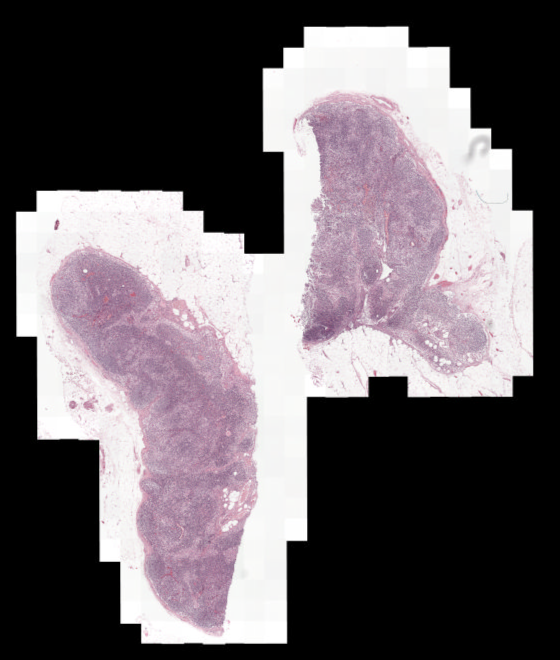

In [15]:
# best size and location for level 6
slide1.read_region(location=(16500, 115000), level=6, size=(560, 660))

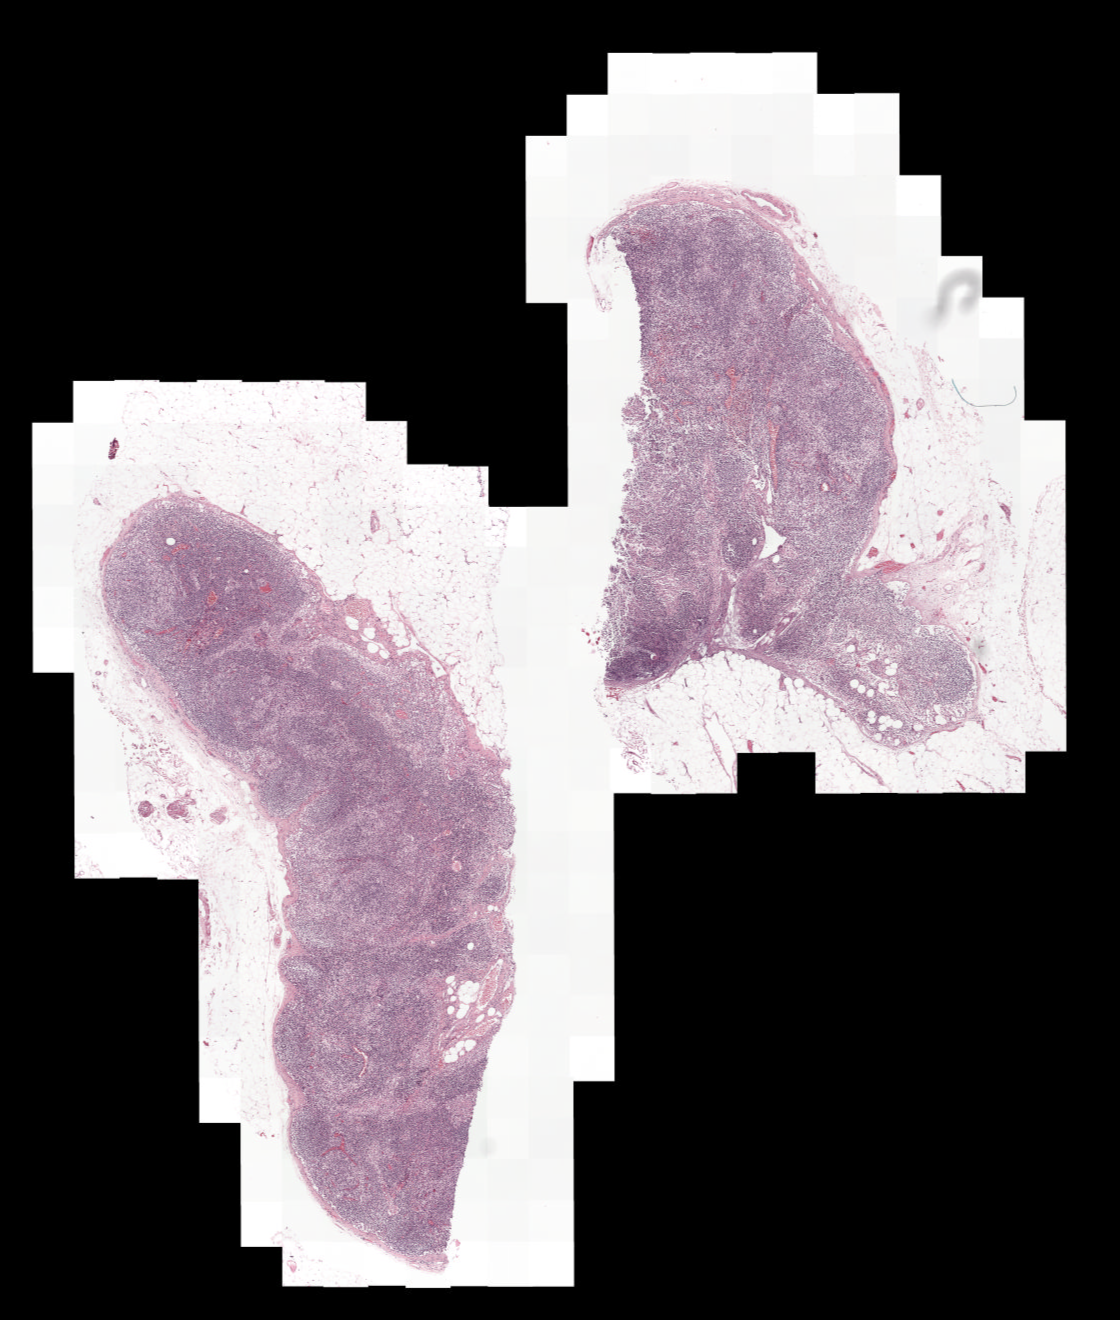

In [16]:
# best size and location for level 5
slide1.read_region(location=(16500, 115000), level=5, size=(1120, 1320))

In [17]:
slide2 = openslide.OpenSlide('/content/drive/MyDrive/Directed Studies/tumor_091.tif')


In [18]:
print(slide2.level_count)

8


In [19]:
print(slide2.level_dimensions)

((61440, 53760), (30720, 26880), (15360, 13440), (7680, 6720), (3840, 3360), (1920, 1680), (960, 840), (480, 420))


In [20]:
print(slide2.level_dimensions[0])
print(slide2.level_dimensions[7])
print(slide2.level_dimensions[7][0])

(61440, 53760)
(480, 420)
480


In [21]:
print(slide2.level_downsamples)

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0)


In [22]:
print(slide2.color_profile)

None


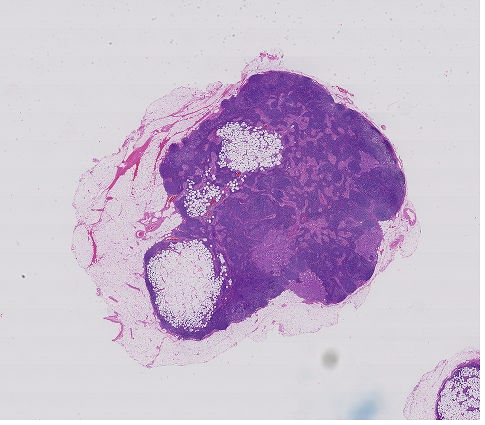

In [23]:
slide2.read_region(location=(0, 0), level=7, size=(485,425))


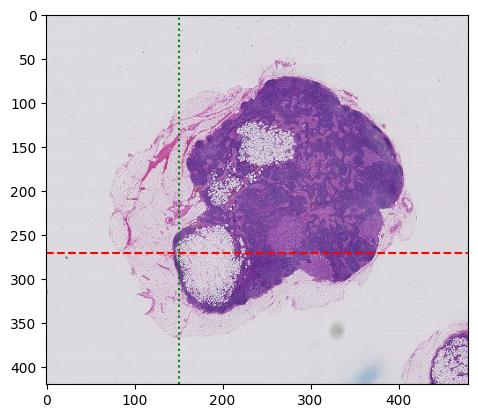

(420, 480, 3)
[220 218 223]
[120  71 153]
[[220 218 223]
 [220 218 223]
 [220 218 223]
 ...
 [220 218 223]
 [217 215 220]
 [215 213 216]]
[[220 218 223]
 [220 218 223]
 [220 218 223]]
195
[[120  71 153]
 [125  76 158]
 [128  81 162]]
(187, 124, 205)
(72, 22, 99)
(214.0, 200.0, 214.0)
420
[207 196 210]
[157  95 178]


In [24]:
region = slide2.read_region(location=(0, 0), level=7, size=(480,420))
rgb_region = region.convert("RGB")
rgb_array = np.array(rgb_region)
rgb_array = rgb_array.astype(int)

plt.imshow(rgb_array)
# plt.axis('off')  # Hide axis
# plt.axhline(y=200, color='r', linestyle='--')
# plt.axvline(x=250, color='g', linestyle=':')
# plt.axvline(x=400, color='g', linestyle=':')
# plt.axvline(x=130, color='g', linestyle=':')
# plt.axhline(y=150, color='r', linestyle='--')
# plt.axvline(x=142, color='g', linestyle=':')
# plt.axvline(x=148, color='g', linestyle=':')
# plt.axvline(x=94, color='g', linestyle=':')
# plt.axhline(y=250, color='r', linestyle='--')
# plt.axvline(x=170, color='g', linestyle=':')
# plt.axvline(x=205, color='g', linestyle=':')
# plt.axhline(y=270, color='r', linestyle='--')
# plt.axvline(x=270, color='g', linestyle=':')
#plt.axvline(x=266, color='g', linestyle=':')
#plt.axvline(x=220, color='g', linestyle=':')
plt.axvline(x=150, color='g', linestyle=':')
plt.axhline(y=270, color='r', linestyle='--')

plt.show()

print(rgb_array.shape)   # coordinates are (height, width, intensity)
print(rgb_array[0, 0])   # red, green, blue at top left
# print(rgb_array[0, 1])   # red, green, blue at top left
# print(rgb_array[424, 0]) # red, green, blue at bottom left
# print(rgb_array[424, 484]) # red, green, blue at bottom right
# print(rgb_array[0, 484]) # red, green, blue at top right
print(rgb_array[200, 250])
print(rgb_array[0, :])  # all the top row pixels
# print(rgb_array[0, :].shape)
print(rgb_array[0, :3]) # top row, first three
# print(rgb_array[0, :3, :1])  # top row, first three, first intensity
print(np.min(rgb_array[0, :, :1]))  # minimum first intensity, first row
print(rgb_array[200, 250:253])
max = (np.max(rgb_array[200, 250:400, :1]),
       np.max(rgb_array[200, 250:400, 1:2]),
       np.max(rgb_array[200, 250:400, 2:3]))
print(max)           # max intensities for purple: (187, 124, 205)
min = (np.min(rgb_array[200, 250:400, :1]),
       np.min(rgb_array[200, 250:400, 1:2]),
       np.min(rgb_array[200, 250:400, 2:3]))
print(min)           # min intensities for purple: (72, 22, 99)
median = (np.median(rgb_array[270, 170:205, :1]),
       np.median(rgb_array[270, 170:205, 1:2]),
       np.median(rgb_array[270, 170:205, 2:3]))
print(median)
# min2 = (np.min(rgb_array[270, 170:205, :1]),
#        np.min(rgb_array[270, 170:205, 1:2]),
#        np.min(rgb_array[270, 170:205, 2:3]).  # if > 200 on all three, then it's tumor
# print(min2)
# print(rgb_array[160, 130])
# print(rgb_array[250, 94])
print(rgb_array.shape[0]) # height
print(rgb_array[270, 180])
print(rgb_array[250, 270])

In [25]:
def check_3_consecutive_elements_in_range(arr, lower_bound, upper_bound):
    # Initialize a counter for consecutive elements
    consecutive_counter = 0

    # Iterate through the array
    for elem in arr:
        if lower_bound <= elem <= upper_bound:
            # Increment the consecutive counter if the element is within the range
            consecutive_counter += 1
            if consecutive_counter == 3:
                # Found exactly 3 consecutive elements within the range
                return True
        else:
            # Reset the consecutive counter if the element is outside the range
            consecutive_counter = 0

    # Did not find exactly 3 consecutive elements within the range
    return False

In [26]:
# location = (150, 250)
def purple_up(location_height, location_width, rgb_array):
  first_dimension_range = rgb_array[0:location_height, location_width, :1]
  second_dimension_range = rgb_array[0:location_height, location_width, 1:2]
  third_dimension_range = rgb_array[0:location_height, location_width, 2:3]

  first = check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
  second = check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
  third = check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

  return first and second and third


In [27]:
# purple up works
print(purple_up(150, 250, rgb_array))
print(purple_up(50, 100, rgb_array))

True
False


In [28]:
def purple_down(location_height, location_width, rgb_array):
  first_dimension_range = rgb_array[location_height:rgb_array.shape[0], location_width, :1]
  second_dimension_range = rgb_array[location_height:rgb_array.shape[0], location_width, 1:2]
  third_dimension_range = rgb_array[location_height:rgb_array.shape[0], location_width, 2:3]

  first = check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
  second = check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
  third = check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

  return first and second and third

In [29]:
# purple down works
print(purple_down(250, 200, rgb_array))
print(purple_down(200, 450, rgb_array))

True
False


In [30]:
def purple_right(location_height, location_width, rgb_array):
  first_dimension_range = rgb_array[location_height, location_width:rgb_array.shape[1], :1]
  second_dimension_range = rgb_array[location_height, location_width:rgb_array.shape[1], 1:2]
  third_dimension_range = rgb_array[location_height, location_width:rgb_array.shape[1], 2:3]

  first = check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
  second = check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
  third = check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

  return first and second and third

In [31]:
# purple right works
print(purple_right(200, 50, rgb_array))
print(purple_right(200, 450, rgb_array))

True
False


In [32]:
def purple_left(location_height, location_width, rgb_array):
  first_dimension_range = rgb_array[location_height, 0:location_width, :1]
  second_dimension_range = rgb_array[location_height, 0:location_width, 1:2]
  third_dimension_range = rgb_array[location_height, 0:location_width, 2:3]

  first = check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
  second = check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
  third = check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

  return first and second and third

In [33]:
# purple left works
print(purple_left(160, 142, rgb_array))
print(purple_left(300, 180, rgb_array))
print(purple_left(270, 400, rgb_array))
print(purple_left(270, 180, rgb_array))

False
True
True
True


In [34]:
def inside_purple(location_height, location_width, rgb_array):
  # given a location inside the wsi, check if there is a 5 pixel range on all four sides
  # around it in the wsi space that are all in the intensity ranges: (72-187), (22-124), (99-205)
  up = purple_up(location_height, location_width, rgb_array)
  down = purple_down(location_height, location_width, rgb_array)
  left = purple_left(location_height, location_width, rgb_array)
  right = purple_right(location_height, location_width, rgb_array)

  return up and down and left and right



In [35]:
# purple inside works
print(inside_purple(250, 130, rgb_array))
print(inside_purple(200, 250, rgb_array))
print(inside_purple(200, 50, rgb_array))
print(inside_purple(300, 180, rgb_array))
print(inside_purple(50, 400, rgb_array))
print()
print(inside_purple(100, 300, rgb_array))
print(inside_purple(100, 250, rgb_array))
print(inside_purple(70, 250, rgb_array))
print(inside_purple(200, 420, rgb_array))
print(inside_purple(270, 200, rgb_array))

False
True
False
True
False

True
True
False
False
True


In [36]:
color = rgb_array[200, 200]
print(color[1])
abs(100-color[1])

195


95

In [37]:
def at_boundary(location_height, location_width, rgb_array):
  # given a location, check if it is at a color boundary
  # if middle pixel (green) is different by 80, it is at boundary

  # get location's green intensity value
  location_green = rgb_array[location_height, location_width, 1]

  different = False
  rgb_neighbors = [
        rgb_array[location_height-1, location_width, 1],  # Top neighbor green
        rgb_array[location_height+1, location_width, 1],  # Bottom neighbor green
        rgb_array[location_height, location_width-1, 1],  # Left neighbor green
        rgb_array[location_height, location_width+1, 1]   # Right neighbor green
  ]
  for neighbor in rgb_neighbors:
    if abs(neighbor - location_green) > 100:
      different = True

  return different




In [38]:
# works at height = 270
for i in range(100, 300):
  if(at_boundary(270, i, rgb_array)):
    print(i)

149
150
151
210
211
212
221
222
224


In [39]:
# kind of works at height = 150
for i in range(200, 300):
  if(at_boundary(150, i, rgb_array)):
    print(i)

220
221
223
225
228
229
230
231
233
244
245
246
249
252
253
257
258
266


In [40]:
print(at_boundary(270, 147, rgb_array))
print(at_boundary(150, 220, rgb_array))
print(at_boundary(150, 257, rgb_array))

print(at_boundary(150, 150, rgb_array))
print(at_boundary(270, 200, rgb_array))

False
True
True
False
False


In [41]:
location_height=50
location_width=50
location_green=rgb_array[location_height, location_width, 1]
print(location_green)
print(rgb_array[location_height-1, location_width, 1])
print(rgb_array[location_height+1, location_width, 1])
print(rgb_array[location_height, location_width-1, 1])
print(rgb_array[location_height, location_width+1, 1])
rgb_neighbors = [
        rgb_array[location_height-1, location_width, 1],  # Top neighbor
        rgb_array[location_height+1, location_width, 1],  # Bottom neighbor
        rgb_array[location_height, location_width-1, 1],  # Left neighbor
        rgb_array[location_height, location_width+1, 1]   # Right neighbor
  ]
for neighbor in rgb_neighbors:
    print(abs(neighbor-location_green) > 80)




220
219
220
220
217
False
False
False
False


Tumor WSI

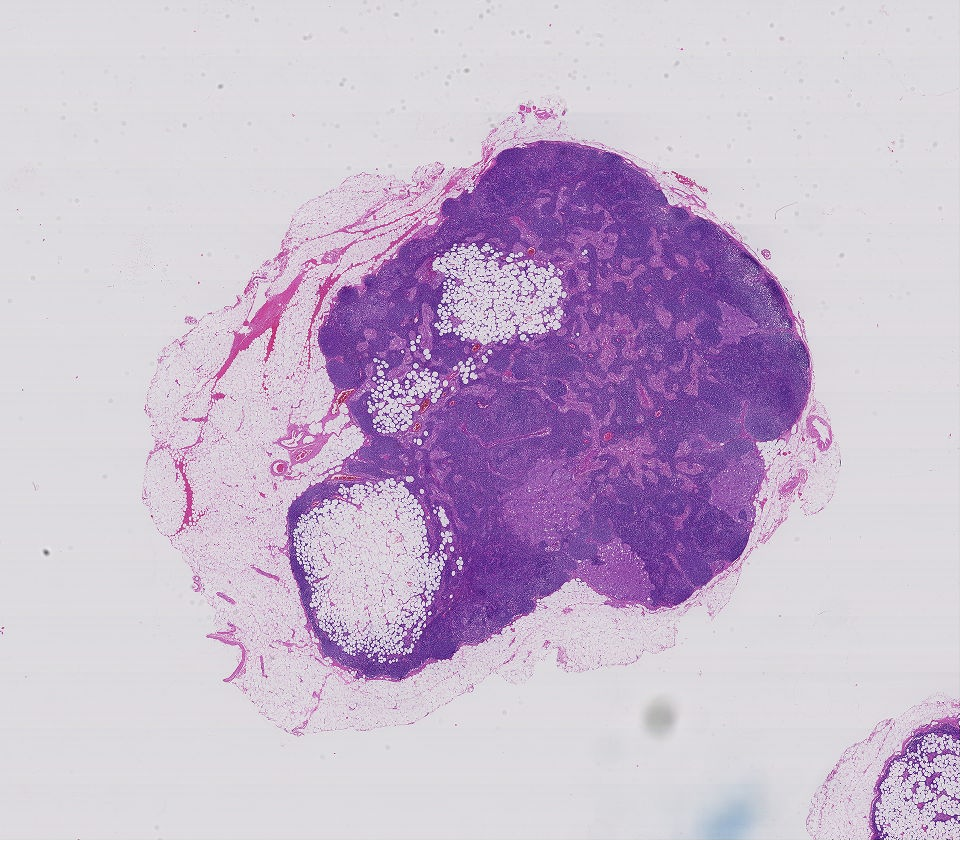

In [42]:
slide2.read_region(location=(0, 0), level=6, size=(485*2,425*2))


Next step: find normal wsi, and compare to tumor image.

In [43]:
slide3 = openslide.OpenSlide('/content/drive/MyDrive/Directed Studies/normal_108.tif')


In [44]:
print(slide3.level_count)

8


In [45]:
print(slide3.dimensions)

(45056, 35840)


In [46]:
print(slide3.level_dimensions[0])
print(slide3.level_dimensions[7])

(45056, 35840)
(352, 280)


In [47]:
print(slide3.level_downsamples)

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0)


In [48]:
print(slide3.color_profile)

None


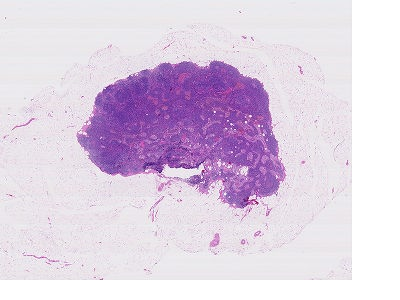

In [49]:
slide3.read_region(location=(0, 0), level=7, size=(400,300))



Normal WSI




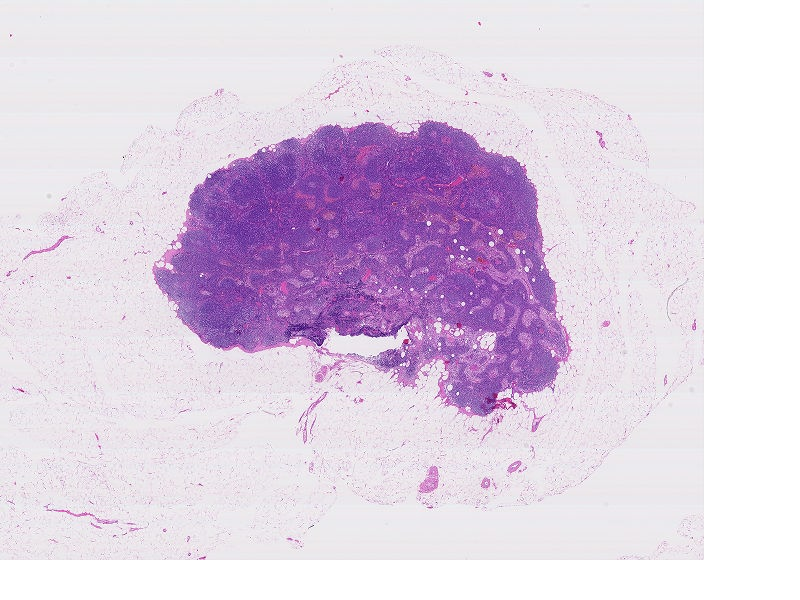

In [50]:
slide3.read_region(location=(0, 0), level=6, size=(400*2,300*2))


I decided that tumor WSI has big chunks of white dotty areas, within the purple area.

Make WSI environment

In [51]:
from gym import Env
from gym import spaces

from gym.spaces import Discrete, Box, Tuple
import numpy as np
import random


State space: 1. pixel value from 0 to 255
             2. pixel position

In [52]:
class WSIEnv(Env):
    def __init__(self, slide_path, max_steps):
        super(WSIEnv, self).__init__()

        # Open the WSI image using OpenSlide
        self.slide = openslide.OpenSlide(slide_path)

        # Get dimensions of the WSI image
        self.width, self.height = self.slide.dimensions

        # Define the observation space
        #pixel_value_low = 0  # Minimum pixel value
        #pixel_value_high = 255  # Maximum pixel value
        position_height_low = 0  # Minimum height position
        position_width_low = 0  # Minimum width position
        position_height_high = self.height - 1  # Maximum height position
        position_width_high = self.width - 1  # Maximum width position

        # pixel_value_space = Box(low=pixel_value_low, high=pixel_value_high, shape=(3,), dtype=np.uint8)
        position_height_space = Box(low=position_height_low, high=position_height_high, shape=(1,), dtype=np.uint16)
        position_width_space = Box(low=position_width_low, high=position_width_high, shape=(1,), dtype=np.uint16)

        self.observation_space = Tuple((position_height_space, position_width_space))

        # Define the action space
        self.action_space = Discrete(4)  # Four possible actions: 0 - left, 1 - down, 2 - right, 3 - up

        # Initialize position variables
        self.position_height = 0  # Starting height position (top-left corner)
        self.position_width = 0  # Starting width position (top-left corner)

        # Initialize rgb_array
        self.rgb_array = None

        # Maximum number of steps for the episode
        self.max_steps = max_steps
        self.current_step = 0  # Initialize current step counter

        self.done = False

    def reset(self):
    # Reset the environment to its initial state
    # Return the initial observation
      self.done = False  # Ensure done is initialized to False
      print(f"Resetting environment. Initial done status: {self.done}")

      region = self.slide.read_region(location=(0, 0), level=self.slide.level_count-1,
                                    size=(self.slide.level_dimensions[self.slide.level_count-1][0],
                                          self.slide.level_dimensions[self.slide.level_count-1][1]))
      rgb_region = region.convert("RGB")
      self.rgb_array = np.array(rgb_region)
      self.rgb_array = self.rgb_array.astype(int)

      # Ensure position_width is within bounds
      self.position_width = np.clip(self.position_width, 0, self.rgb_array.shape[1] - 1)

      #initial_observation = {
        #'pixel_value': self.rgb_array[0, 0],
        #'position_height': np.array([0], dtype=np.uint16),  # Starting height position (top-left corner)
        #'position_width': np.array([0], dtype=np.uint16)   # Starting width position (top-left corner)
      #}
     # Construct the initial observation as per the observation space
      pixel_value = self.rgb_array[0, 0]  # Example value, update based on your logic
      position_height = np.array([0], dtype=np.uint16)  # Starting height position (top-left corner)
      position_width = np.array([0], dtype=np.uint16)   # Starting width position (top-left corner)
      initial_observation = ((position_height, position_width))
      return initial_observation

    def check_3_consecutive_elements_in_range(self, arr, lower_bound, upper_bound):
        # Initialize a counter for consecutive elements
        consecutive_counter = 0

        # Iterate through the array
        for elem in arr:
            if lower_bound <= elem <= upper_bound:
                # Increment the consecutive counter if the element is within the range
                consecutive_counter += 1
                if consecutive_counter == 3:
                    # Found exactly 3 consecutive elements within the range
                    return True
            else:
                # Reset the consecutive counter if the element is outside the range
                consecutive_counter = 0

        # Did not find exactly 3 consecutive elements within the range
        return False

    def purple_up(self):
        # Logic to check if the pixel above is purple
        if self.position_height > 0 and self.position_width < self.rgb_array.shape[1]:
          first_dimension_range = self.rgb_array[0:self.position_height, self.position_width, :1]
          second_dimension_range = self.rgb_array[0:self.position_height, self.position_width, 1:2]
          third_dimension_range = self.rgb_array[0:self.position_height, self.position_width, 2:3]

          first = self.check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
          second = self.check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
          third = self.check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

          return first and second and third

        else:
          return False

    def purple_down(self):

        if self.position_height < self.rgb_array.shape[0] - 1 and self.position_width < self.rgb_array.shape[1]:# Logic to check if the pixel below is purple
          first_dimension_range = self.rgb_array[self.position_height:self.rgb_array.shape[0], self.position_width, :1]
          second_dimension_range = self.rgb_array[self.position_height:self.rgb_array.shape[0], self.position_width, 1:2]
          third_dimension_range = self.rgb_array[self.position_height:self.rgb_array.shape[0], self.position_width, 2:3]

          first = self.check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
          second = self.check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
          third = self.check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

          return first and second and third
        else:
          return False

    def purple_right(self):
        # Logic to check if the pixel to the right is purple
        first_dimension_range = self.rgb_array[self.position_height, self.position_width:self.rgb_array.shape[1], :1]
        second_dimension_range = self.rgb_array[self.position_height, self.position_width:self.rgb_array.shape[1], 1:2]
        third_dimension_range = self.rgb_array[self.position_height, self.position_width:self.rgb_array.shape[1], 2:3]

        first = self.check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
        second = self.check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
        third = self.check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

        return first and second and third

    def purple_left(self):
        # Logic to check if the pixel to the left is purple
        first_dimension_range = self.rgb_array[self.position_height, 0:self.position_width, :1]
        second_dimension_range = self.rgb_array[self.position_height, 0:self.position_width, 1:2]
        third_dimension_range = self.rgb_array[self.position_height, 0:self.position_width, 2:3]

        first = self.check_3_consecutive_elements_in_range(first_dimension_range, 72, 187)
        second = self.check_3_consecutive_elements_in_range(second_dimension_range, 22, 124)
        third = self.check_3_consecutive_elements_in_range(third_dimension_range, 99, 205)

        return first and second and third


    def inside_purple(self, location_height, location_width, rgb_array):
        up = self.purple_up()
        down = self.purple_down()
        left = self.purple_left()
        right = self.purple_right()

        return up and down and left and right

    def check_at_boundary(self, location_height, location_width, rgb_array):
    # Get location's green intensity value
      if 0 <= location_width < rgb_array.shape[1]:
        location_green = rgb_array[location_height, location_width, 1]
      else:
    # Handle the case where location_width is out of bounds
    # For example, you can set location_green to a default value or raise an error.
    # Here, I'm setting it to a default value of 0.
        location_green = 0

      different = False
      rgb_neighbors = []

    # Check top neighbor
      if location_height > 0 and 0 <= location_width < rgb_array.shape[1]:
        rgb_neighbors.append(rgb_array[location_height-1, location_width, 1])
      else:
        rgb_neighbors.append(location_green)

    # Check bottom neighbor
      if location_height < rgb_array.shape[0] - 1 and 0 <= location_width < rgb_array.shape[0] - 1:
        rgb_neighbors.append(rgb_array[location_height+1, location_width, 1])
      else:
        rgb_neighbors.append(location_green)

     # Check left neighbor
      if 0 <= location_width < rgb_array.shape[1]:
        if location_width > 0:
            rgb_neighbors.append(rgb_array[location_height, location_width - 1, 1])
        else:
            rgb_neighbors.append(location_green)
      else:
        rgb_neighbors.append(location_green)

    # Check right neighbor (adjusted to stay within bounds)
      if 0 <= location_width < rgb_array.shape[1]:
        if location_width < rgb_array.shape[1] - 1:
            rgb_neighbors.append(rgb_array[location_height, location_width + 1, 1])
        else:
            rgb_neighbors.append(location_green)
      else:
        rgb_neighbors.append(location_green)

      for neighbor in rgb_neighbors:
        if abs(neighbor - location_green) > 100:
            different = True

      return different






    def at_boundary(self, location_height, location_width, rgb_array):
        return self.check_at_boundary(location_height, location_width, rgb_array)

    def get_observation(self):
      # Get the pixel value at the current position
        # pixel_value = self.slide.read_region(location=(self.position_width, self.position_height), level=0,
        #                                    size=(1, 1)).convert('L').getpixel((0, 0))
      if 0 <= self.position_height < self.rgb_array.shape[0] and 0 <= self.position_width < self.rgb_array.shape[1]:
        pixel_value = self.rgb_array[self.position_height, self.position_width]
        # Construct the observation dictionary
        observation = {
          #'pixel_value': np.array([pixel_value], dtype=np.uint8),
          'position_height': np.array([self.position_height], dtype=np.uint16),
          'position_width': np.array([self.position_width], dtype=np.uint16)
        }

        return observation

      else:
        # Handle the case where position indices are out of bounds by clipping them to valid indices
        new_position_height = np.clip(self.position_height, 0, self.rgb_array.shape[0] - 1)
        new_position_width = np.clip(self.position_width, 0, self.rgb_array.shape[1] - 1)

        # Get the pixel value at the corrected position
        pixel_value = self.rgb_array[new_position_height, new_position_width]

        # Construct the observation dictionary with corrected indices
        observation = {
            #'pixel_value': np.array([pixel_value], dtype=np.uint8),
            'position_height': np.array([new_position_height], dtype=np.uint16),
            'position_width': np.array([new_position_width], dtype=np.uint16)
        }

        return observation

    def step(self, action):
    # Step 1: Interpret the action and update the environment
      if action == 0:  # Move left
        if self.position_width == 0:
          self.position_width = self.position_width
        else:
          self.position_width = self.position_width - 1

      elif action == 1:  # Move down
        if self.position_height == self.height - 1:  # Check if already at the bottom
            self.position_height = self.position_height
        elif self.position_height < self.rgb_array.shape[0] - 1:  # Check bounds
            self.position_height = self.position_height + 1

      elif action == 2:  # Move right
        if self.position_width == self.width:
          self.position_width = self.position_width
        else:
          self.position_width = self.position_width + 1

      elif action == 3:  # Move up
        if self.position_height == 0:
          self.position_height = self.position_height
        else:
          self.position_height = self.position_height - 1

    # Check if the agent is at a boundary and inside a purple area
      if self.at_boundary(self.position_height, self.position_width, self.rgb_array) and \
            self.inside_purple(self.position_height, self.position_width, self.rgb_array):
          reward = 1  # Reward for being at boundary and inside purple
      else:
          reward = 0

    # Increment current step count
      self.current_step += 1

    # Check if the maximum number of steps has been reached
      done = self.current_step >= self.max_steps

    # Return the next observation, reward, done flag, and additional info
      next_observation = self.get_observation()
      return next_observation, reward, done, {}






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Initialize the environment
env = WSIEnv(slide_path="/content/drive/MyDrive/Directed Studies/tumor_091.tif", max_steps=500)

# Print slide properties
print("Slide dimensions:", env.slide.dimensions)
print("Slide levels:", env.slide.level_count)

# Reset the environment
initial_observation = env.reset()

# Print and verify the initial observation
print("Initial Observation:", initial_observation)




Slide dimensions: (61440, 53760)
Slide levels: 8
Resetting environment. Initial done status: False
Initial Observation: (array([0], dtype=uint16), array([0], dtype=uint16))


In [54]:
# Initialize the environment
env = WSIEnv(slide_path="/content/drive/MyDrive/Directed Studies/tumor_091.tif", max_steps=360)

# Reset the environment
initial_observation = env.reset()
print(env.done)
env.position_height = 270
env.position_width = 140
done = False
# action = 2
# observation, reward, done, _ = env.step(action)
#Continue taking steps until done or max_steps is reached
while not done:
    # Take another action
    action = 2
    observation, reward, done, _ = env.step(action)

    # Print the observation, reward, and done status
    print(f"Observation: {observation}, Reward: {reward}, Done: {done}")

# After the loop ends, you can print or log the final observation, reward, and done status
print(f"Final Observation: {observation}, Final Reward: {reward}, Done: {done}")





Resetting environment. Initial done status: False
False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([141], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([142], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([143], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([144], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([145], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([146], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_height': array([270], dtype=uint16), 'position_width': array([147], dtype=uint16)}, Reward: 0, Done: False
Observation: {'position_hei

In [55]:
"""import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np

# Define the DQNAgent class
class DQNAgent:
    def __init__(self, observation_space_shape, action_space_n):
        self.observation_space_shape = observation_space_shape
        self.action_space_n = action_space_n
        self.epsilon = 1.0  # Initial exploration rate
        self.gamma = 0.99  # Discount factor
        self.model = self.build_model()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)

    def build_model(self):
        model = nn.Sequential(
            nn.Linear(self.observation_space_shape, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.action_space_n)
        )
        return model

    def select_action(self, state):
        # Epsilon-greedy policy for action selection
        if random.random() < self.epsilon:
            return random.randint(0, self.action_space_n - 1)
        else:
            with torch.no_grad():
                q_values = self.model(torch.tensor(state, dtype=torch.float32))
                return q_values.argmax().item()

    def train(self, state, action, reward, next_state, done):
    # Extract values from the state dictionary and convert them to the appropriate data type
      pixel_value = torch.tensor(state['pixel_value'], dtype=torch.float32)
      position_height = torch.tensor([state['position_height']], dtype=torch.int64)  # Wrap in list and change to torch.int64
      position_width = torch.tensor([state['position_width']], dtype=torch.int64)  # Wrap in list and change to torch.int64

    # Construct the state tensor
      state_tensor = torch.cat((pixel_value.unsqueeze(0),
                              position_height.float().unsqueeze(0),
                              position_width.float().unsqueeze(0)), dim=0)

    # Similarly, extract values from the next_state dictionary and construct the next_state tensor
      pixel_value_next = torch.tensor(next_state['pixel_value'], dtype=torch.float32)
      position_height_next = torch.tensor([next_state['position_height']], dtype=torch.int64)  # Wrap in list and change to torch.int64
      position_width_next = torch.tensor([next_state['position_width']], dtype=torch.int64)  # Wrap in list and change to torch.int64

    # Construct the next_state tensor
      next_state_tensor = torch.cat((pixel_value_next.unsqueeze(0),
                                   position_height_next.float().unsqueeze(0),
                                   position_width_next.float().unsqueeze(0)), dim=0)

      action = torch.tensor(action)
      reward = torch.tensor(reward, dtype=torch.float32)
      done = torch.tensor(done, dtype=torch.float32)

      q_value = self.model(state_tensor)[action]
      next_q_value = self.model(next_state_tensor).max().detach()

      target_q_value = reward + self.gamma * next_q_value * (1 - done)

      loss = nn.MSELoss()(q_value, target_q_value)

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      if self.epsilon > 0.01:
        self.epsilon *= 0.99  # Decrease exploration rate over time










# Initialize the environment and agent
env = WSIEnv(slide_path='/content/drive/MyDrive/Directed Studies/tumor_091.tif', max_steps=1000)  # Initialize your environment
# Calculate observation_space_shape correctly
observation_space_shape = env.observation_space.spaces[0].shape[0] + \
                          env.observation_space.spaces[1].shape[0] + \
                          env.observation_space.spaces[2].shape[0]
action_space_n = env.action_space.n

# Initialize the agent with the correct observation space shape and action space size
agent = DQNAgent(observation_space_shape=observation_space_shape, action_space_n=action_space_n)
"""


"import torch\nimport torch.nn as nn\nimport torch.optim as optim\nimport random\nimport numpy as np\n\n# Define the DQNAgent class\nclass DQNAgent:\n    def __init__(self, observation_space_shape, action_space_n):\n        self.observation_space_shape = observation_space_shape\n        self.action_space_n = action_space_n\n        self.epsilon = 1.0  # Initial exploration rate\n        self.gamma = 0.99  # Discount factor\n        self.model = self.build_model()\n        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)\n\n    def build_model(self):\n        model = nn.Sequential(\n            nn.Linear(self.observation_space_shape, 64),\n            nn.ReLU(),\n            nn.Linear(64, 64),\n            nn.ReLU(),\n            nn.Linear(64, self.action_space_n)\n        )\n        return model\n\n    def select_action(self, state):\n        # Epsilon-greedy policy for action selection\n        if random.random() < self.epsilon:\n            return random.randint(0, self

In [56]:
"""num_episodes = 1000
max_steps_per_episode = 1000

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)

        # Ensure reward and done are converted to the appropriate data types
        reward = torch.tensor(reward, dtype=torch.float32)
        done = torch.tensor(done, dtype=torch.float32)

        agent.train(state, action, reward, next_state, done)

        total_reward += reward.item()  # Update total_reward with reward value
        state = next_state

        if done:
            break

    # Print episode information
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")
"""


'num_episodes = 1000\nmax_steps_per_episode = 1000\n\nfor episode in range(num_episodes):\n    state = env.reset()\n    total_reward = 0\n\n    for step in range(max_steps_per_episode):\n        action = agent.select_action(state)\n        next_state, reward, done, _ = env.step(action)\n\n        # Ensure reward and done are converted to the appropriate data types\n        reward = torch.tensor(reward, dtype=torch.float32)\n        done = torch.tensor(done, dtype=torch.float32)\n\n        agent.train(state, action, reward, next_state, done)\n\n        total_reward += reward.item()  # Update total_reward with reward value\n        state = next_state\n\n        if done:\n            break\n\n    # Print episode information\n    print(f"Episode {episode + 1}: Total Reward = {total_reward}")\n'

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NFQAgent:
    def __init__(self, observation_space, action_space, gamma=0.99, epsilon=0.1, learning_rate=0.001):
        self.observation_space = observation_space
        self.action_space = action_space
        self.gamma = gamma
        self.epsilon = epsilon
        #print(len(observation_space.shape[0]))
        print(len(observation_space))
        print(self.action_space.n)
        print(self.observation_space)
        print(self.action_space)
        self.q_network = QNetwork(len(observation_space), action_space.n)
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=learning_rate)

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.action_space.sample()
        else:
            with torch.no_grad():
                q_values = self.q_network(torch.tensor(state, dtype=torch.float32))
                return torch.argmax(q_values).item()

    def train(self, state, action, next_state, reward, done):
        q_values = self.q_network(torch.tensor(state, dtype=torch.float32))
        q_value = q_values[:,action]

        with torch.no_grad():
            next_q_values = self.q_network(torch.tensor(next_state, dtype=torch.float32))
            print(next_state)
            max_next_q_value = torch.max(next_q_values).item()
            target_q_value = reward + (1 - done) * self.gamma * max_next_q_value

        loss = nn.MSELoss()(q_value, torch.tensor(target_q_value, dtype=torch.float32))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Initialize your environment and NFQ agent
env = WSIEnv(slide_path='/content/drive/MyDrive/Directed Studies/tumor_091.tif', max_steps=1000)
print(env.observation_space, env.action_space)
num_episodes=100
nfq_agent = NFQAgent(env.observation_space, env.action_space)
# Training loop
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        print(state)
        action = nfq_agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        nfq_agent.train(state, action, next_state, reward, done)  # Pass all required arguments to train method
        state = (next_state['position_height'], next_state['position_width'])
        print(torch.tensor(state, dtype=torch.float32).shape)



Tuple(Box(0, 53759, (1,), uint16), Box(0, 61439, (1,), uint16)) Discrete(4)
2
4
Tuple(Box(0, 53759, (1,), uint16), Box(0, 61439, (1,), uint16))
Discrete(4)
Resetting environment. Initial done status: False
(array([0], dtype=uint16), array([0], dtype=uint16))


<ipython-input-57-4ac63fdbcdd5>:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  q_values = self.q_network(torch.tensor(state, dtype=torch.float32))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x1 and 2x128)

In [ ]:
print(env.action_space)

In [ ]:
print(env.action_space.n)